## Part I. Fetch Data and Data Cleaning
See https://tushare.pro/document/2 for tushare API document

In [1]:
# Install tushare
# pip install tushare

In [2]:
import pandas as pd
import numpy as np
import tushare as ts

ts.set_token('f5cd5ac60f1cd9a51a12fa6d5980978ab630fc8f9fc8004e736ef666')

In [3]:
ts.__version__ # 1.2.62

'1.2.62'

### 1. Initialize API

In [4]:
pro = ts.pro_api()

### 2. Read in convertibles info and tushare parameters

In [5]:
cb = pd.read_excel('CB info.xlsx',sheet_name='cb_list').set_index('名称')
cb_dict = dict(zip(cb.loc['正股代码'], cb.loc['代码']))
cb

,光大转债,宁行转债,平银转债,中信转债,苏银转债,电气转债,现代转债,浙商转债,国君转债,长证转债,...,浦发转债,川投转债,核能转债,核建转债,顺丰转债,希望转债,淮矿转债,环境转债,烽火转债,国贸转债
名称,,,,,,,,,,,,,,,,,,,,,
代码,113011.SH,128024.SZ,127010.SZ,113021.SH,110053.SH,113008.SH,110057.SH,113022.SH,113013.SH,127005.SZ,...,110059.SH,110061.SH,113026.SH,113024.SH,128080.SZ,127015.SZ,110065.SH,113028.SH,110062.SH,110033.SH
正股代码,601818.SH,002142.SZ,000001.SZ,601998.SH,600919.SH,601727.SH,600420.SH,601878.SH,601211.SH,000783.SZ,...,600000.SH,600674.SH,601985.SH,601611.SH,002352.SZ,000876.SZ,600985.SH,601200.SH,600498.SH,600755.SH


In [6]:
# tushare params to be specified in the next cell
ts_field_params = ','.join(list(pd.read_excel('CB info.xlsx',sheet_name='ts_params',header=None).iloc[:,0]))

### 3. Fetch convertibles basics from tushare

In [7]:
cb_basic_info = pd.DataFrame()

for cb_ticker in cb.loc['代码']:
    cb_basic_info = cb_basic_info.append(pro.cb_basic(ts_code=cb_ticker,fields=ts_field_params))

cb_basic_info.index = cb_basic_info.ts_code

# cb_basic_info.to_excel('cb_basic_info.xlsx')
cb_basic_info.head()

,ts_code,bond_full_name,bond_short_name,cb_code,stk_code,stk_short_name,maturity,par,issue_price,issue_size,...,put_clause,maturity_put_price,call_clause,reset_clause,conv_clause,guarantor,guarantee_type,issue_rating,newest_rating,rating_comp
ts_code,,,,,,,,,,,,,,,,,,,,,
113011.SH,113011.SH,中国光大银行股份有限公司公开发行可转换公司债券,光大转债,191011,601818.SH,光大银行,6.0,100.0,None,3.000000e+10,...,None,105.0,None,None,None,None,None,None,None,None
128024.SZ,128024.SZ,宁波银行股份有限公司公开发行可转换公司债券,宁行转债,None,002142.SZ,宁波银行,6.0,100.0,None,1.000000e+10,...,None,105.0,None,None,None,None,None,None,None,None
127010.SZ,127010.SZ,平安银行股份有限公司公开发行可转换公司债券,平银转债,None,000001.SZ,平安银行,6.0,100.0,None,2.600000e+10,...,None,110.0,None,None,None,None,None,None,None,None
113021.SH,113021.SH,中信银行股份有限公司公开发行A股可转换公司债券,中信转债,191021,601998.SH,中信银行,6.0,100.0,None,4.000000e+10,...,None,111.0,None,None,None,None,None,None,None,None
110053.SH,110053.SH,江苏银行股份有限公司公开发行A股可转换公司债券,苏银转债,190053,600919.SH,江苏银行,6.0,100.0,None,2.000000e+10,...,None,111.0,None,None,None,None,None,None,None,None


### 4. Fetch convertibles issuance info

In [8]:
## run if needed
cb_issue_info = pd.DataFrame()

for cb_ticker in cb.loc['代码']:
    cb_issue_info = cb_issue_info.append(pro.cb_basic(ts_code=cb_ticker))

cb_issue_info.index = cb_issue_info.ts_code
# cb_issue_info.to_excel('cb_issue_info.xlsx')
cb_issue_info.head()

,ts_code,bond_full_name,bond_short_name,cb_code,stk_code,stk_short_name,maturity,par,issue_price,issue_size,...,add_rate,pay_per_year,list_date,delist_date,exchange,conv_start_date,conv_end_date,first_conv_price,conv_price,rate_clause
ts_code,,,,,,,,,,,,,,,,,,,,,
113011.SH,113011.SH,中国光大银行股份有限公司公开发行可转换公司债券,光大转债,191011,601818.SH,光大银行,6.0,100.0,None,3.000000e+10,...,None,1,2017-04-05,None,SH,2017-09-18,2023-03-16,4.36,3.55,None
128024.SZ,128024.SZ,宁波银行股份有限公司公开发行可转换公司债券,宁行转债,None,002142.SZ,宁波银行,6.0,100.0,None,1.000000e+10,...,None,1,2018-01-12,2019-08-30,SZ,2018-06-11,2023-12-04,18.45,17.70,None
127010.SZ,127010.SZ,平安银行股份有限公司公开发行可转换公司债券,平银转债,None,000001.SZ,平安银行,6.0,100.0,None,2.600000e+10,...,None,1,2019-02-18,2019-09-27,SZ,2019-07-25,2025-01-20,11.77,11.63,None
113021.SH,113021.SH,中信银行股份有限公司公开发行A股可转换公司债券,中信转债,191021,601998.SH,中信银行,6.0,100.0,None,4.000000e+10,...,None,1,2019-03-19,None,SH,2019-09-11,2025-03-03,7.45,6.98,None
110053.SH,110053.SH,江苏银行股份有限公司公开发行A股可转换公司债券,苏银转债,190053,600919.SH,江苏银行,6.0,100.0,None,2.000000e+10,...,None,1,2019-04-03,None,SH,2019-09-20,2025-03-13,7.90,6.37,None


In [9]:
cb_issue_info.iloc[0]

ts_code                           113011.SH
bond_full_name      中国光大银行股份有限公司公开发行可转换公司债券
bond_short_name                        光大转债
cb_code                              191011
stk_code                          601818.SH
stk_short_name                         光大银行
maturity                                6.0
par                                   100.0
issue_price                            None
issue_size                    30000000000.0
remain_size                            None
value_date                       2017-03-17
maturity_date                    2023-03-17
rate_type                              None
coupon_rate                            None
add_rate                               None
pay_per_year                              1
list_date                        2017-04-05
delist_date                            None
exchange                                 SH
conv_start_date                  2017-09-18
conv_end_date                    2023-03-16
first_conv_price                

### 5. Fetch convertibles daily price volume data

In [10]:
# Use 113011.SH as an example.
cb_ts = pro.cb_daily(ts_code='113011.SH').sort_values(by=['trade_date']).set_index('trade_date')
# sh_113011.to_excel('113011_SH_光大转债.xlsx')
cb_ts.head()

,ts_code,pre_close,open,high,low,close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
20170405,113011.SH,100.00,102.00,103.15,101.25,103.00,3.00,3.0000,9703291.0,995859.1811
20170406,113011.SH,103.00,102.93,103.83,102.52,103.61,0.61,0.5922,1827218.0,188797.7469
20170407,113011.SH,103.61,103.61,103.61,102.80,103.00,-0.61,-0.5887,1118471.0,115729.2607
20170410,113011.SH,103.00,103.03,103.60,102.91,103.44,0.44,0.4272,1262294.0,130451.0808
20170411,113011.SH,103.44,103.24,103.30,102.91,103.29,-0.15,-0.1450,735445.0,75808.3742


### 6. Fetch stock daily price volume data

In [11]:
# Use 601818.SH as an example.
stock_ticker = '601818.SH'
cb_ticker = cb_dict[stock_ticker]

list_date = cb_basic_info.loc[cb_ticker, 'list_date']
list_date = ''.join(list_date.split('-'))

eq_ts = pro.daily(ts_code=stock_ticker, start_date=list_date).sort_values(by=['trade_date']).set_index('trade_date')
# sh_601818.to_excel('601818_SH_光大银行.xlsx')
eq_ts.head()

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
20170405,601818.SH,4.10,4.11,4.07,4.11,4.11,0.00,0.00,911169.98,373185.944
20170406,601818.SH,4.10,4.10,4.06,4.08,4.11,-0.03,-0.73,904914.22,368757.706
20170407,601818.SH,4.07,4.08,4.04,4.07,4.08,-0.01,-0.25,726632.24,295355.756
20170410,601818.SH,4.06,4.07,4.04,4.05,4.07,-0.02,-0.49,545135.53,220952.519
20170411,601818.SH,4.05,4.06,4.01,4.04,4.05,-0.01,-0.25,838610.72,338252.443


### 7. Fetch conversion price changes

In [12]:
# ts_codes in cb_price_chg() supports multiple ticker query. eg. ts_code='113556.SH,128114.SZ,128110.SZ'
cb_price_chg = pro.cb_price_chg(ts_code=cb_ticker).set_index('change_date', drop=True)
cb_price_chg

,ts_code,bond_short_name,publish_date,convert_price_initial,convertprice_bef,convertprice_aft
change_date,,,,,,
20170317,113011.SH,光大转债,20170315,4.36,NaN,NaN
20170705,113011.SH,光大转债,20170628,4.36,4.36,4.26
20171226,113011.SH,光大转债,20171223,4.36,4.26,4.31
20180727,113011.SH,光大转债,20180721,4.36,4.31,4.13
20190626,113011.SH,光大转债,20190619,4.36,4.13,3.97
20200624,113011.SH,光大转债,20200616,4.36,3.97,3.76
20210721,113011.SH,光大转债,20210713,4.36,3.76,3.55


### 8. Fetch conversion info for each execution

In [13]:
cb_share = pro.cb_share(ts_code=cb_ticker)
cb_share

,ts_code,bond_short_name,publish_date,end_date,issue_size,convert_price_initial,convert_price,convert_val,convert_vol,convert_ratio,acc_convert_val,acc_convert_vol,acc_convert_ratio,remain_size,total_shares
0,113011.SH,光大转债,2021-07-22,2021-07-21,3.000000e+10,4.26,3.55,4998.40,1408.0,0.000017,5.801117e+09,1.542821e+09,19.3371,2.419888e+10,5.403192e+10
1,113011.SH,光大转债,2021-07-06,2021-05-24,3.000000e+10,4.26,3.76,1010.80,265.0,0.000003,5.801112e+09,1.542820e+09,19.3370,2.419889e+10,5.403191e+10
2,113011.SH,光大转债,2021-05-18,2021-05-17,3.000000e+10,4.26,3.76,996.40,265.0,0.000003,5.801111e+09,1.542820e+09,19.3370,2.419889e+10,5.403191e+10
3,113011.SH,光大转债,2021-04-28,2021-04-27,3.000000e+10,4.26,3.76,996.40,265.0,0.000003,5.801110e+09,1.542819e+09,19.3370,2.419889e+10,5.403191e+10
4,113011.SH,光大转债,2021-04-02,2021-04-01,3.000000e+10,4.26,3.76,996.40,265.0,0.000003,5.801109e+09,1.542819e+09,19.3370,2.419889e+10,5.403191e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,113011.SH,光大转债,2017-09-26,2017-09-22,3.000000e+10,4.36,4.26,1997.94,469.0,0.000007,7.994742e+04,1.876700e+04,0.0003,2.999992e+10,4.667911e+10
116,113011.SH,光大转债,2017-09-25,2017-09-21,3.000000e+10,4.36,4.26,4992.72,1172.0,0.000017,7.794948e+04,1.829800e+04,0.0003,2.999992e+10,4.667911e+10
117,113011.SH,光大转债,2017-09-22,2017-09-20,3.000000e+10,4.36,4.26,7996.02,1877.0,0.000027,7.295676e+04,1.712600e+04,0.0002,2.999993e+10,4.667911e+10
118,113011.SH,光大转债,2017-09-21,2017-09-19,3.000000e+10,4.36,4.26,9985.44,2344.0,0.000033,6.496074e+04,1.524900e+04,0.0002,2.999994e+10,4.667911e+10


19.333333


<AxesSubplot:ylabel='Frequency'>

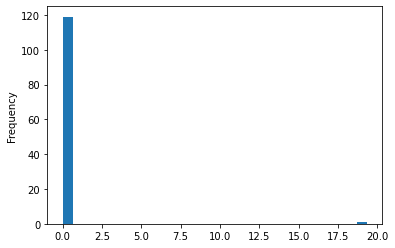

In [14]:
print(np.max(cb_share.convert_ratio))
cb_share.convert_ratio.plot.hist(bins=30)

## Part II. Pricer

<h4>Bond base</h4>

<h4>Clauses: Options price = long call + long put + short call + short put</h4> <br>
<b>1. conv_clause (转股条款)</b>: American style long call which allows investor to convert the cb into equity at the conversion price. Usually can only exercise after the first 6 months since the list date. The tenor is typically 6 years. <br><br>
<b>2. reset_clause (下修条款)</b>: Reset the conversion price to a lower level if stock price is not so good. Usually happens when the stock price is below some threshold. Short put. $f(\text{time}, \text{current_conversion_price})$ <br><br>
<b>3. call_clause (回售条款)</b>: Basically a put provision, usually get triggered when stock price is too low and only two years remaining. Not all convertibles offer such clause. Can be regarded as long put. <br><br>
<b>4. put_clause (赎回条款)</b>: Redeem at par plus accured interest when: 1. expire 2. stock price is too high. Short call.

<h5>Conversion clause</h5><br>
在任意连续三十个交易日中有十五个交易日的收盘价低于当期转股价格的80%。<br>
If close price of 15 out of random 30 consecutive trading days is lower than the current conversion price*0.8, then <br>$\text{new conversion price = max(mean(last 30 days close), last 1 day close)}$

<h5>Put clause</h5><br>
(1)到期赎回条款在本次发行的可转债期满后五个交易日内,本行将以本次发行的可转债的票面面值的105%(含最后一期年度利息)的价格向投资者赎回全部未转股的可转债。<br>(2)有条件赎回条款在本次发行可转债的转股期内,如果本行A股股票连续三十个交易日中至少有十五个交易日的收盘价格不低于当期转股价格的130%(含130%),经相关监管部门批准(如需),本行有权按照债券面值加当期应计利息的价格赎回全部或部分未转股的可转债。若在上述交易日内发生过因除权、除息等引起本行转股价格调整的情形,则在调整前的交易日按调整前的转股价格和收盘价格计算,在调整后的交易日按调整后的转股价格和收盘价格计算。此外,当本次发行的可转债未转股的票面总金额不足人民币3,000万元时,本行有权按面值加当期应计利息的价格赎回全部未转股的可转债。当期应计利息的计算公式为:IA=B×i×t/365IA:指当期应计利息;B:指本次发行的可转债持有人持有的将赎回的可转债票面总金额;i:指可转债当年票面利率;t:指计息天数,即从上一个付息日起至本计息年度赎回日止的实际日历天数(算头不算尾)。

(1) Company will redeem all convertibles at par\*105%.<br>
(2) For the last 30 trading days, if at least 15 of them have a close price higher than conversion price\*130%, Company will reserve the right of force redemption.


<h5>Call clause</h5><br>
在本次发行的可转债存续期间内,如公司本次发行可转债募集资金的使用与公司在募集说明书中的承诺相比出现重大变化,被中国证监会认定为改变募集资金用途的,可转债持有人享有一次按面值加上当期应计利息的价格向公司回售其持有的部分或全部可转债的权利。持有人在回售条件满足后,可以在公司公告的回售申报期内进行回售,该次回售申报期内未进行回售申报或未实施回售的,不应再行使本次回售权。除此之外,可转债不可由持有人主动回售。

In [15]:
ceb_cb_info = cb_basic_info.iloc[0]
ceb_cb_info

ts_code                             113011.SH
bond_full_name        中国光大银行股份有限公司公开发行可转换公司债券
bond_short_name                          光大转债
cb_code                                191011
stk_code                            601818.SH
stk_short_name                           光大银行
maturity                                  6.0
par                                     100.0
issue_price                              None
issue_size                      30000000000.0
remain_size                              None
value_date                         2017-03-17
maturity_date                      2023-03-17
rate_type                                None
coupon_rate                              None
add_rate                                 None
pay_per_year                                1
list_date                          2017-04-05
delist_date                              None
exchange                                   SH
conv_start_date                    2017-09-18
conv_end_date                     

In [16]:
ceb_cb_info.maturity_date

'2023-03-17'

In [19]:
# Slicing the data set, use data early than 2021 as training set and 2021 as validation set
eq_train = eq_ts.close.loc['2017':'2020']
eq_valid = eq_ts.close.loc['2021':]

cb_train = cb_ts.close.loc['2017':'2019']
cb_valid = cb_ts.close.loc['2021':]

In [20]:
sigma = np.log(eq_train).diff().std()*np.sqrt(252)
sigma

0.2071766512576054

In [21]:
cb_price_chg

,ts_code,bond_short_name,publish_date,convert_price_initial,convertprice_bef,convertprice_aft
change_date,,,,,,
20170317,113011.SH,光大转债,20170315,4.36,NaN,NaN
20170705,113011.SH,光大转债,20170628,4.36,4.36,4.26
20171226,113011.SH,光大转债,20171223,4.36,4.26,4.31
20180727,113011.SH,光大转债,20180721,4.36,4.31,4.13
20190626,113011.SH,光大转债,20190619,4.36,4.13,3.97
20200624,113011.SH,光大转债,20200616,4.36,3.97,3.76
20210721,113011.SH,光大转债,20210713,4.36,3.76,3.55


In [22]:
S0 = eq_train[-1]
conversion_price = cb_price_chg.loc[:'2020', 'convertprice_aft'][-1]
S0, conversion_price

(4.41, 3.97)

In [23]:
sim_periods = eq_valid.shape[0] # simulation periods
# date_simulation_range = 30
sim_periods

135

In [24]:
r = 0.03
coupon = np.array([0.2, 0.5, 1, 1.5, 1.8, 2])/100
par = 100
n_MC = 10000
dt = 1/365

#### Step 1. Simulate 1000 paths from 2021.1 until today

In [25]:
# Simulate daily stock price
S = S0*np.exp(((r-sigma**2/2)*dt+sigma*np.sqrt(dt)*np.random.randn(n_MC, sim_periods)).cumsum(axis=1))
pd.DataFrame(S)

,0,1,2,3,4,5,6,7,8,9,...,125,126,127,128,129,130,131,132,133,134
0,4.388881,4.432021,4.431346,4.428619,4.464009,4.496166,4.518114,4.517242,4.459521,4.456027,...,3.826718,3.861595,3.925912,3.922647,3.863890,3.851784,3.824081,3.790346,3.808966,3.775364
1,4.438817,4.314705,4.242769,4.224633,4.214247,4.120387,4.114918,4.107607,4.109134,4.110576,...,3.923240,3.919889,3.850569,3.846780,3.893944,3.858543,3.825626,3.819052,3.787049,3.766115
2,4.391152,4.503576,4.573991,4.551559,4.654818,4.610228,4.605297,4.619636,4.680285,4.700073,...,5.014713,4.978986,5.014590,5.069662,5.091338,5.142680,5.129941,5.259863,5.287617,5.269915
3,4.355782,4.382002,4.430478,4.475919,4.340565,4.340211,4.335727,4.291725,4.210287,4.152662,...,4.211461,4.148740,4.190456,4.152251,4.143979,4.134968,4.124981,4.122865,4.036466,3.979368
4,4.448217,4.376392,4.318063,4.379844,4.294518,4.285618,4.286826,4.280952,4.267301,4.212511,...,3.886430,3.829838,3.803688,3.800554,3.706563,3.653618,3.697667,3.770516,3.857211,3.841569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4.405250,4.411432,4.479448,4.427198,4.372559,4.437022,4.415092,4.466681,4.433022,4.437452,...,4.597060,4.541405,4.566618,4.563039,4.560177,4.582545,4.584439,4.618016,4.635653,4.615022
9996,4.363800,4.319953,4.330538,4.339324,4.303748,4.296410,4.239317,4.157650,4.101624,4.144398,...,3.662843,3.680143,3.774974,3.788084,3.747950,3.691760,3.735997,3.719406,3.678023,3.614410
9997,4.408909,4.446191,4.431982,4.479827,4.525221,4.609446,4.542977,4.429566,4.491183,4.431616,...,4.831186,4.857236,4.930486,4.879633,4.891344,4.897473,4.800428,4.752765,4.764993,4.666607
9998,4.451801,4.451369,4.398476,4.360106,4.397552,4.375550,4.380276,4.322301,4.340377,4.327763,...,4.152161,4.107213,4.061720,4.076723,4.089700,4.128700,4.142823,4.192990,4.149734,4.143086


In [32]:
# pd.DataFrame(S).iloc[:100].T.plot(legend=False)

In [36]:
eq_ts

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
20170405,601818.SH,4.10,4.11,4.07,4.11,4.11,0.00,0.0000,911169.98,373185.944
20170406,601818.SH,4.10,4.10,4.06,4.08,4.11,-0.03,-0.7300,904914.22,368757.706
20170407,601818.SH,4.07,4.08,4.04,4.07,4.08,-0.01,-0.2500,726632.24,295355.756
20170410,601818.SH,4.06,4.07,4.04,4.05,4.07,-0.02,-0.4900,545135.53,220952.519
20170411,601818.SH,4.05,4.06,4.01,4.04,4.05,-0.01,-0.2500,838610.72,338252.443
...,...,...,...,...,...,...,...,...,...,...
20210719,601818.SH,3.65,3.66,3.61,3.65,3.65,0.00,0.0000,903167.21,328372.521
20210720,601818.SH,3.64,3.66,3.63,3.65,3.65,0.00,0.0000,901381.66,328522.977
20210721,601818.SH,3.46,3.48,3.43,3.43,3.44,-0.01,-0.2907,1102467.42,380249.045


In [38]:
100/3.45*3.55

102.89855072463767

In [35]:
cb_ts

,ts_code,pre_close,open,high,low,close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
20170405,113011.SH,100.00,102.00,103.15,101.25,103.00,3.00,3.0000,9703291.0,995859.1811
20170406,113011.SH,103.00,102.93,103.83,102.52,103.61,0.61,0.5922,1827218.0,188797.7469
20170407,113011.SH,103.61,103.61,103.61,102.80,103.00,-0.61,-0.5887,1118471.0,115729.2607
20170410,113011.SH,103.00,103.03,103.60,102.91,103.44,0.44,0.4272,1262294.0,130451.0808
20170411,113011.SH,103.44,103.24,103.30,102.91,103.29,-0.15,-0.1450,735445.0,75808.3742
...,...,...,...,...,...,...,...,...,...,...
20210719,113011.SH,115.09,115.09,115.20,113.99,114.80,-0.29,-0.2520,168990.0,19362.6465
20210720,113011.SH,114.80,114.70,114.91,114.21,114.50,-0.30,-0.2613,41922.0,4799.3848
20210721,113011.SH,114.50,114.51,115.20,114.15,114.59,0.09,0.0786,105501.0,12081.6299


#### Step 2. Simulate the conversion price

In [30]:
# # 在任意连续三十个交易日中有十五个交易日的收盘价低于当期转股价格的80%。
# # If close price of 15 out of random 30 consecutive trading days is lower than the current conversion price*0.8, then
# # new conversion price >= max(mean(last 30 days close), last 1 day close)

# def conversion_price_check(path, S0=S0,init_conversion_price=conversion_price):
    
#     count_30 = 0
#     count_15 = 0
    
#     i_begin = 0
#     i_end = 0
    
#     conversion_price_mod = np.ones(len(path))*init_conversion_price
#     for i,price in enumerate(path):
#         if price <= conversion_price_mod[i]*0.8:
#             count_15 += 1        
#             if count_15 == 1:
#                 i_begin = i
#             elif count_15 == 15:
#                 i_end = i
#                 i_gap = i_end - i_begin
#                 if i_gap <= 30:
#                     print('Trigger')
#                     conversion_price_mod[i:] = max(np.mean(path[i-i_gap:i]), path[i])
#                     i_begin = i_end = count_30 = count_15 = 0
                    
#     return conversion_price_mod

In [31]:
# for path in S:
#     conversion_price_check(path)

#### Step 3. LSM Model:<br> 

In [29]:
# discounted_payoff = par*1.05

# for nn in np.arange(n_MC-1,0,-1):
    
#         continuationPayoffDiscounted = np.exp(-r*dt)*payoffDiscounted
#         # This is the CONTINUATION payoff (cashflow) along each path,
#         # discounted to time nn (for nn=N-1,N-2,...)
        
#         X=paths[:,nn-1]               
#         exerciseValue = K-X

#         basisfunctions = np.stack((np.ones(M), X, X**2), axis=-1)

#         coefficients = scipy.linalg.lstsq(basisfunctions[(exerciseValue > 0)], 
#                                           continuationPayoffDiscounted[(exerciseValue > 0)])[0]

#         estimatedContinuationValue = np.sum((basisfunctions * coefficients), axis = 1)
#         whichPathsToExercise = (exerciseValue >= np.maximum(estimatedContinuationValue, 0))
            
#         payoffDiscounted[
#             whichPathsToExercise] = exerciseValue[whichPathsToExercise] 
#         payoffDiscounted[np.logical_not(
#             whichPathsToExercise)] = continuationPayoffDiscounted[np.logical_not(whichPathsToExercise)]

# continuationPayoffDiscounted = np.exp(-r * dt) * payoffDiscounted;
# estimatedContinuationValue = np.mean(continuationPayoffDiscounted);
# putprice = max(K - S0, estimatedContinuationValue);